---
# Análise de Avaliação e Faturamento de um E-commerse

![E-commerce](https://www.kcollector.com.br/wp-content/uploads/2018/11/085124-que-es-ecommerce.jpg)

O e-commerce (ou comércio eletrônico) refere-se à compra e venda de produtos ou serviços pela internet. Ele pode ser realizado por meio de lojas virtuais, marketplaces, aplicativos ou até redes sociais, proporcionando praticidade e acessibilidade aos consumidores. Com o avanço da tecnologia e o aumento do uso da internet, o e-commerce se tornou um dos principais canais de vendas para empresas de todos os tamanhos.

Um dos fatores essenciais para o sucesso no comércio eletrônico é a avaliação dos clientes. As avaliações e comentários ajudam a construir a credibilidade da loja, influenciando diretamente a decisão de compra de novos consumidores.

Em um ambiente altamente competitivo, onde os consumidores têm diversas opções à disposição, a avaliação se torna um diferencial estratégico. Afinal, clientes satisfeitos não apenas retornam para novas compras, mas também recomendam a loja para outras pessoas, impulsionando ainda mais o crescimento do e-commerce.

---
### Objetivo do Projeto


Este projeto tem como finalidade realizar uma análise descritiva para verificar a relação entre avaliações, faturamento e quantidade vendida dos produtos de um e-commerce. Utilizando um conjunto de dados extraído de uma query no SQL Server, buscamos responder às seguintes perguntas:

- Qual a distribuição percentual acumulada do faturamento por avaliação média?
- Os produtos que mais faturam possuem boas avaliações?
- Os produtos mais vendidos possuem boas avaliações?
- Como a avaliação média das categorias se relaciona com seu faturamento?

---
### Fonte dos Dados

Os dados utilizados neste projeto foram extraídos do Kaggle, uma plataforma de compartilhamento de conjuntos de dados e competições de ciência de dados. O conjunto de dados utilizado pertence ao seguinte repositório:  

🔗 [Online Shop 2024 Dataset - Kaggle](https://www.kaggle.com/datasets/marthadimgba/online-shop-2024?select=shipments.csv)  

Este dataset contém informações sobre produtos, pedidos, clientes, fornecedores e avaliações e outros aspectos de um e-commerce.

---
### Simulação da Base de Dados no SQL Server  

Para trazer uma abordagem mais realista ao projeto, os dados foram carregados no **SQL Server**, simulando um ambiente empresarial. A partir disso, foram criadas **views** que consolidam informações relevantes para a análise.  

#### Construção das Views  

Duas **views** principais foram criadas para facilitar a extração e manipulação dos dados:  

1. `reviewr_produto`: Consolida as avaliações de cada produto, associando notas e textos às categorias correspondentes.  
2. `venda_produto`: Relaciona produtos vendidos com suas respectivas quantidades e preços de compra.  


🔗 **[Acessar código SQL completo](SQLQuery1.sql)**  

---
### Importação das Bibliotecas


No projeto, utilizamos diferentes bibliotecas do **Python**, organizadas de acordo com sua funcionalidade:  

In [1]:
# 1 - Gerenciamento de Credenciais
# Essas bibliotecas permitem o uso seguro de credenciais sem exposição direta no código:
from dotenv import load_dotenv
import os

# 2 - Conexão com o Banco de Dados
# Utilizamos sqlalchemy para estabelecer a conexão com o SQL Server e acessar os dados:
from sqlalchemy import create_engine

# 3 - Leitura e Manipulação de Dados
# Essas bibliotecas são responsáveis por carregar os dados e realizar transformações essenciais:
import pandas as pd
import numpy as np
import warnings

# 4 - Criação e Personalização de Gráficos
# Para a visualização dos resultados, utilizamos matplotlib, incluindo elementos personalizados:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch # Usado para criar formas geométricas (ex: retângulos) em legendas
from matplotlib.lines import Line2D # Usado para criar linhas personalizadas em gráficos


### Carregamento de Credenciais do Banco de Dados

Para garantir a segurança das credenciais do banco de dados, utilizamos a biblioteca `dotenv`, que permite armazenar variáveis sensíveis em um arquivo `.env`. Com isso, carregamos as credenciais do ambiente e as armazenamos em variáveis para uso posterior na conexão com o banco de dados.

In [2]:
load_dotenv() # Carrega as variáveis de ambiente do arquivo .env
HOST = os.getenv("HOST") # Obtém o valor da variável HOST do ambiente
DB = os.getenv("DB") # Obtém o nome do banco de dados
DRIVER = os.getenv("DRIVER") # Obtém o driver utilizado para conexão com o banco de dados

### Estabelecendo a Conexão com o Banco de Dados

Após carregar as credenciais do banco de dados, utilizamos a biblioteca `SQLAlchemy` para estabelecer a conexão com o SQL Server. A `connection_string` é montada com as variáveis de ambiente carregadas anteriormente, garantindo uma conexão segura e eficiente.

In [3]:
# Monta a string de conexão com base nas credenciais carregadas
connection_string = f"mssql+pyodbc://@{HOST}/{DB}?driver={DRIVER}&trusted_connection=yes"

# Cria o motor de conexão com o banco de dados
engine = create_engine(connection_string)
conn = engine.connect() # Estabelece a conexão
print("Conexão bem-sucedida!")

Conexão bem-sucedida!


Caso queira aprender como criar essa conexão no seu computador, você pode assistir a este vídeo explicativo: [Configuração da Conexão com SQL Server](https://www.youtube.com/watch?v=yWZ-ur2jhm8&t=865s).

### Carregando os Dados

Após conectar ao SQL Server, vamos extrair os dados das **views** criadas e armazená-los em DataFrames. Em seguida, fecharemos a conexão para otimizar recursos e ocultaremos os avisos desnecessários."

In [4]:
# Definição das queries para extrair os dados das views criadas no SQL Server
query_review = "SELECT * FROM reviewr_produto"
query_vendas = "SELECT * FROM venda_produto"

# Executa as queries e armazena os resultados em DataFrames
df_reviewr = pd.read_sql(query_review, conn)
df_vendas = pd.read_sql(query_vendas, conn)

# Fecha a conexão com o banco de dados
conn.close()

# Oculta avisos desnecessários que podem ser gerados durante a execução do código
warnings.filterwarnings("ignore")

# Configura o pandas para exibir todas as colunas do DataFrame sem truncar a visualização  
pd.set_option("display.max_columns", None)

# Exibe os DataFrames carregados
display(df_reviewr)
display(df_vendas)

,Nome do Produto,Categoria,Avaliacao,Texto Avaliacao
0,Office Chair,Furniture,4,"""Great product"
1,Office Chair,Furniture,4,"""Great product"
2,Office Chair,Furniture,4,"""Great product"
3,Office Chair,Furniture,4,"""Great product"
4,Office Chair,Furniture,4,"""Great product"
...,...,...,...,...
1101,Storage Containers,Home & Kitchen,1,Would definitely buy again!
1102,Storage Containers,Home & Kitchen,1,Would definitely buy again!
1103,Storage Containers,Home & Kitchen,1,Would definitely buy again!
1104,Storage Containers,Home & Kitchen,1,Would definitely buy again!


,Nome do Produto,Categoria do Produto,Quantidade Vendida,Preco
0,Storage Shelf,Furniture,1,342.92
1,Desk Lamp,Home & Kitchen,1,955.86
2,Rice Cooker,Home & Kitchen,1,909.45
3,External SSD,Electronics,1,984.91
4,Kitchen Blender,Home & Kitchen,1,649.18
...,...,...,...,...
19995,Power Strip,Electronics,4,33.18
19996,Wireless Charger,Electronics,4,33.18
19997,4K Monitor,Electronics,4,33.19
19998,Food Processor,Home & Kitchen,4,33.20


---
### Análise Exploratória da Tabela Reviews

Vamos analisar a estrutura dos dados da tabela de reviews, identificando os tipos de variáveis e realizando as conversões necessárias.

#### Verificação dos tipos de dados e ajustes necessários

Primeiramente, vamos visualizar as primeiras linhas da tabela e analisar os tipos de dados de cada coluna:

In [5]:
display(df_reviewr.head())  # Exibe as primeiras linhas do DataFrame
df_reviewr.info()  # Mostra informações sobre os tipos de dados e valores nulos

,Nome do Produto,Categoria,Avaliacao,Texto Avaliacao
0,Office Chair,Furniture,4,"""Great product"
1,Office Chair,Furniture,4,"""Great product"
2,Office Chair,Furniture,4,"""Great product"
3,Office Chair,Furniture,4,"""Great product"
4,Office Chair,Furniture,4,"""Great product"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nome do Produto  1106 non-null   object
 1   Categoria        1106 non-null   object
 2   Avaliacao        1106 non-null   object
 3   Texto Avaliacao  1106 non-null   object
dtypes: object(4)
memory usage: 34.7+ KB


Observamos que todas as colunas estão no formato `object` (string). Para uma melhor manipulação dos dados:

- **Coluna "Nome do Produto", "Categoria" e "Texto Avaliacao:** Serão convertidas para o tipo `category`, pois representam informações qualitativas.

- **Coluna "Avaliação":** Apesar de ser uma variável categórica ordinal, será convertida para `float`, pois será utilizada para cálculos, como a média ponderada.

In [6]:
for coluna in df_reviewr.columns:
    if coluna == "Avaliacao":
        df_reviewr[coluna] = df_reviewr[coluna].astype('float')  # Conversão para float
    else:
        df_reviewr[coluna] = df_reviewr[coluna].astype('category')  # Conversão para categórico

df_reviewr.info()  # Verifica se as mudanças foram aplicadas corretamente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Nome do Produto  1106 non-null   category
 1   Categoria        1106 non-null   category
 2   Avaliacao        1106 non-null   float64 
 3   Texto Avaliacao  1106 non-null   category
dtypes: category(3), float64(1)
memory usage: 17.3 KB


#### Calculando a Média Ponderada das Avaliações por Produto

A média ponderada é uma métrica essencial para avaliar os produtos de forma mais justa, levando em conta a quantidade de avaliações recebidas por cada nota.

Se utilizássemos uma **média simples**, todas as notas teriam o mesmo peso, o que poderia distorcer a real percepção do produto pelos clientes. A **média ponderada** permite atribuir maior peso às avaliações mais frequentes, resultando em um valor mais representativo.

Por exemplo, um produto que recebeu 100 avaliações com nota 4 e apenas 5 avaliações com nota 1 terá uma média ponderada mais próxima de 4, refletindo melhor a opinião da maioria dos clientes.

Caso queira entender mais sobre esse conceito, você pode conferir estes artigos:

🔗 [O que é Média Ponderada?](https://brasilescola.uol.com.br/matematica/media-ponderada.htm) 

🔗 [Por que calcular Média Ponderada nas Avaliações?](https://www.cloudhumans.com/use-claudia/post/como-medir-csat?utm_source=chatgpt.com)

In [7]:
# Contamos quantas vezes cada nota de avaliação aparece para cada produto
resultado = df_reviewr.groupby(['Nome do Produto', 'Avaliacao'], observed=False)['Avaliacao'].count().reset_index(name='Quantidade de Avaliacoes')

# Calculamos a média ponderada das avaliações para cada produto
df_media_ponderada = resultado.groupby('Nome do Produto', observed=False).apply(
    lambda x: (x['Avaliacao'] * x['Quantidade de Avaliacoes']).sum() / x['Quantidade de Avaliacoes'].sum()
).reset_index(name='Media Ponderada')

# Exibimos os primeiros resultados
display(df_media_ponderada.head())

,Nome do Produto,Media Ponderada
0,4K Monitor,2.0
1,Air Purifier,4.0
2,Bath Towels,3.0
3,Bluetooth Headphones,3.0
4,Bookshelf,3.0


#### Visualizando a Média Ponderada das Avaliações

Agora que calculamos a média ponderada das avaliações por produto, vamos representá-la graficamente. Essa visualização nos ajudará a verificar o ranking dos produtos com base na satisfação dos clientes, facilitando a identificação dos mais bem avaliados e dos que possuem avaliações mais baixas.

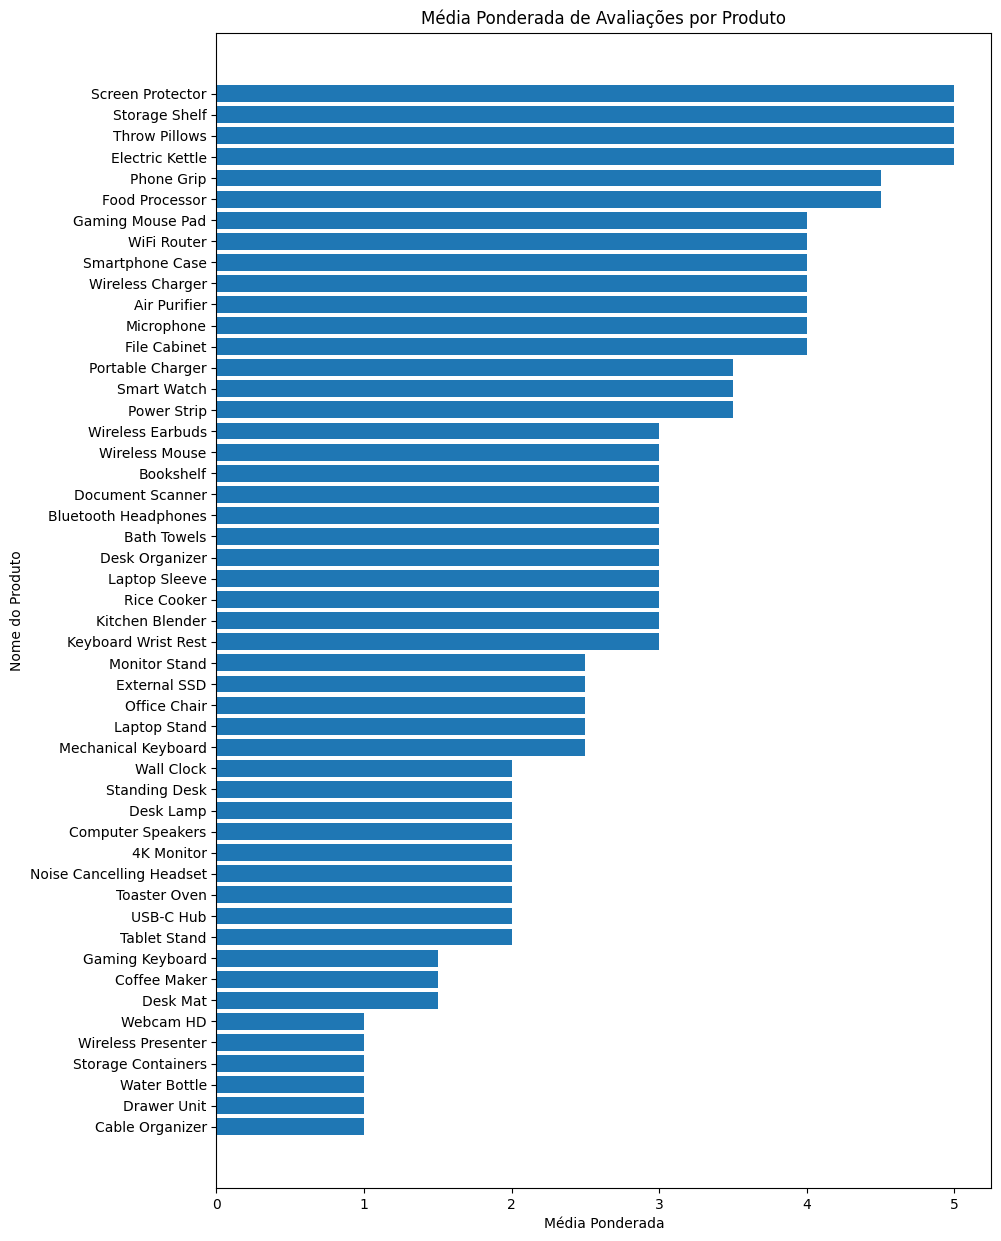

In [8]:
# Ordenando o DataFrame pela Média Ponderada para melhor visualização
df_media_ponderada = df_media_ponderada.sort_values(by='Media Ponderada')

# Definindo o tamanho da figura do gráfico
plt.figure(figsize=(10, 15))

# Criando um gráfico de barras horizontais
plt.barh(df_media_ponderada['Nome do Produto'], df_media_ponderada['Media Ponderada'])

# Definindo rótulos dos eixos e título do gráfico
plt.xlabel('Média Ponderada')
plt.ylabel('Nome do Produto')
plt.title('Média Ponderada de Avaliações por Produto')

# Exibindo o gráfico
plt.show()

Com essa visualização, podemos verificar o ranking dos produtos conforme sua avaliação. Agora, vamos analisar os dados de vendas para entender se produtos bem avaliados geram mais faturamento.

---
### Análise Exploratoria da Tabela Vendas

Nesta etapa, seguiremos a mesma abordagem utilizada na tabela de reviews. Vamos analisar a estrutura dos dados da tabela de vendas, identificar os tipos de variáveis e realizar as conversões necessárias.

#### Verificando os Tipos de Variáveis

Primeiro, visualizamos as primeiras linhas do DataFrame e verificamos os tipos de dados de cada coluna.

In [9]:
# Exibir as primeiras linhas do DataFrame de vendas
display(df_vendas.head())

# Exibir informações sobre os tipos de dados das colunas
df_vendas.info

,Nome do Produto,Categoria do Produto,Quantidade Vendida,Preco
0,Storage Shelf,Furniture,1,342.92
1,Desk Lamp,Home & Kitchen,1,955.86
2,Rice Cooker,Home & Kitchen,1,909.45
3,External SSD,Electronics,1,984.91
4,Kitchen Blender,Home & Kitchen,1,649.18


<bound method DataFrame.info of         Nome do Produto Categoria do Produto Quantidade Vendida   Preco
0         Storage Shelf            Furniture                  1  342.92
1             Desk Lamp       Home & Kitchen                  1  955.86
2           Rice Cooker       Home & Kitchen                  1  909.45
3          External SSD          Electronics                  1  984.91
4       Kitchen Blender       Home & Kitchen                  1  649.18
...                 ...                  ...                ...     ...
19995       Power Strip          Electronics                  4   33.18
19996  Wireless Charger          Electronics                  4   33.18
19997        4K Monitor          Electronics                  4   33.19
19998    Food Processor       Home & Kitchen                  4   33.20
19999      External SSD          Electronics                  4   33.20

[20000 rows x 4 columns]>

Observamos que todas as colunas estão no formato `object` (string). Para uma melhor manipulação dos dados:

- **Coluna "Nome do Produto" e "Categoria do Produto:** Serão convertidas para o tipo `category`, pois elas são variaveis categoricas nominais.

- **Coluna "Quatidade Vendida":** Será convertida para `int`, pois ela é uma variavel quantitativa discreta.

- **Coluna "Preço":** Sera convertida para `float`, pois ela é uma variavel quantitativa contínua.

In [10]:
for coluna in df_vendas.columns:
    if coluna == "Quantidade Vendida":
        df_vendas[coluna] = df_vendas[coluna].astype('int') # Convertendo para inteiro
    elif coluna == "Preco":
        df_vendas[coluna] = df_vendas[coluna].astype('float') # Convertendo para float
    else:
        df_vendas[coluna] = df_vendas[coluna].astype('category') # Convertendo para categoria

# Verificando novamente os tipos de dados após a conversão
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Nome do Produto       20000 non-null  category
 1   Categoria do Produto  20000 non-null  category
 2   Quantidade Vendida    20000 non-null  int64   
 3   Preco                 20000 non-null  float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 354.3 KB


#### Calculando o Valor Total de Cada Pedido

Primeiro, vamos calcular o valor total de cada pedido, multiplicando a quantidade de produtos vendidos pelo preço unitário.

In [11]:
# Calculando o valor total de cada pedido
df_vendas['Valor Total de Vendas'] = df_vendas['Quantidade Vendida'] * df_vendas['Preco']

# Exibindo as primeiras linhas do DataFrame atualizado
display(df_vendas.head())

,Nome do Produto,Categoria do Produto,Quantidade Vendida,Preco,Valor Total de Vendas
0,Storage Shelf,Furniture,1,342.92,342.92
1,Desk Lamp,Home & Kitchen,1,955.86,955.86
2,Rice Cooker,Home & Kitchen,1,909.45,909.45
3,External SSD,Electronics,1,984.91,984.91
4,Kitchen Blender,Home & Kitchen,1,649.18,649.18


#### Criando a Tabela de Faturamento por Produto

Agora, vamos agrupar os produtos para calcular o faturamento total de cada um.

In [12]:
# Agrupando os produtos e somando o faturamento total de cada um
df_faturamento_por_produto = df_vendas.groupby(['Nome do Produto'])[['Valor Total de Vendas']].sum().reset_index()

# Renomeando a coluna para um nome mais direto
df_faturamento_por_produto = df_faturamento_por_produto.rename(columns={'Valor Total de Vendas': 'Faturamento'})

# Exibindo as primeiras linhas do DataFrame atualizado
display(df_faturamento_por_produto.head())

,Nome do Produto,Faturamento
0,4K Monitor,1028666.50
1,Air Purifier,924883.08
2,Bath Towels,834142.27
3,Bluetooth Headphones,894944.67
4,Bookshelf,865720.79


#### Visualizando o Faturamento dos Produtos

Agora, vamos visualizar os produtos com maior faturamento por meio de um gráfico de barras. Isso nos ajudará a identificar quais produtos estão gerando mais receita.

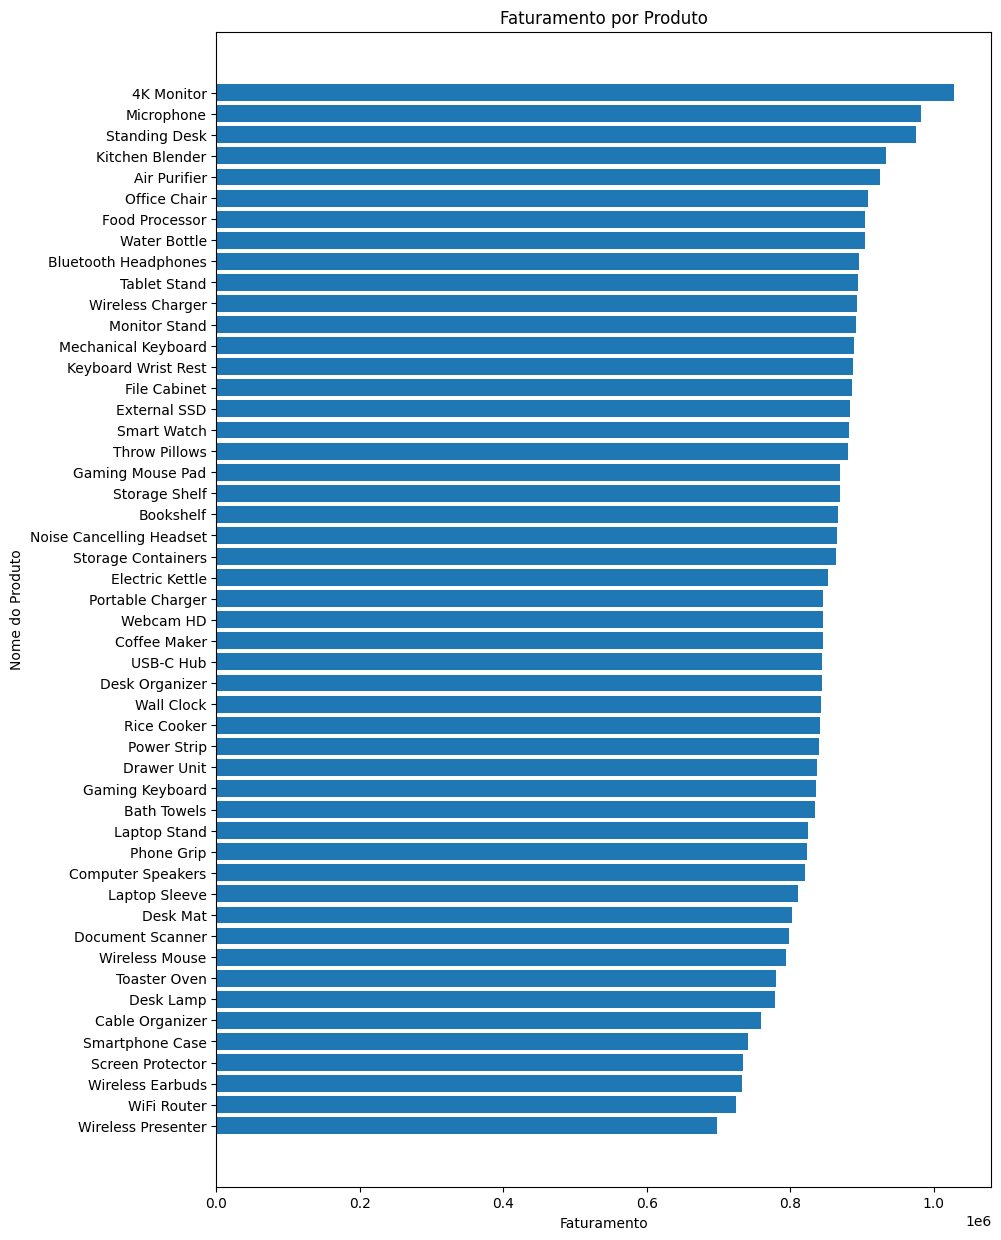

In [13]:
# Ordenando os produtos do menor para o maior faturamento
df_faturamento_por_produto = df_faturamento_por_produto.sort_values(by="Faturamento")

# Definindo o tamanho da figura do gráfico
plt.figure(figsize=(10, 15)) 

# Criando o gráfico de barras horizontais
plt.barh(df_faturamento_por_produto['Nome do Produto'], df_faturamento_por_produto['Faturamento'])

# Definindo rótulos dos eixos e título do gráfico
plt.title('Faturamento por Produto')  
plt.xlabel('Faturamento')  
plt.ylabel('Nome do Produto')  

# Exibindo o gráfico
plt.show()

Com esse gráfico conseguimos identificar quais produtos geram mais receita.

---
### Criando Tabela para a Análise da Distribuição Percentual do Faturamento por Avaliação Média

Agora que temos os dados de avaliação média por produto e o faturamento total por produto, o próximo passo é unir essas informações para entendermos como a avaliação impacta na geração de receita.

Faremos isso através da junção (`merge`) dos dois dataframes:

- `df_media_ponderada` → contém a média das avaliações por produto.

- `df_faturamento_por_produto` → contém o faturamento por produto.

Usaremos um ` how='left'`, mantendo todos os produtos presentes na base de avaliações. Isso nos permitirá verificar se todos os produtos avaliados também foram vendidos, além de nos preparar para responder a pergunta:

**"Qual a distribuição percentual acumulada do faturamento por avaliação média?"**

In [14]:
# Realizando o merge entre a tabela de avaliações e faturamento
df_produtos_avaliacao_faturamento = df_media_ponderada.merge(df_faturamento_por_produto, on='Nome do Produto', how='left')

# Exibe as primeiras linhas do dataframe resultante
display(df_produtos_avaliacao_faturamento.head())

# Verificando se há produtos avaliados que não foram vendidos
produtos_sem_venda = df_produtos_avaliacao_faturamento[df_produtos_avaliacao_faturamento['Faturamento'].isnull()]
print(f"Quantidade de produtos com avaliação mas sem venda: {len(produtos_sem_venda)}")

,Nome do Produto,Media Ponderada,Faturamento
0,Cable Organizer,1.0,758298.83
1,Drawer Unit,1.0,837184.03
2,Water Bottle,1.0,903662.53
3,Storage Containers,1.0,863608.96
4,Wireless Presenter,1.0,697765.51


Quantidade de produtos com avaliação mas sem venda: 0


Unificamos os dataframes de média de avaliação e faturamento por produto para consolidar as informações em uma única base. Aproveitamos esse momento para verificar se havia algum produto avaliado que não foi vendido, e o resultado foi zero ocorrências — algo esperado, já que, em um ambiente de e-commerce, é mais comum encontrar produtos vendidos sem avaliação do que o contrário.

#### Criando colunas de percentual de faturamento

Vamos calcular a participação de cada produto no faturamento total, e também o acumulado dessa participação. Isso nos ajudará a entender o peso de cada produto na receita geral.

In [15]:
# Criando a coluna de percentual do faturamento de cada produto
df_produtos_avaliacao_faturamento['Percentual do Faturamento'] = (
    df_produtos_avaliacao_faturamento['Faturamento'] / 
    df_faturamento_por_produto['Faturamento'].sum()
)

# Verificando se a soma dos percentuais totaliza 100%
print(sum(df_produtos_avaliacao_faturamento['Percentual do Faturamento']))

# Criando a coluna de percentual acumulado do faturamento
df_produtos_avaliacao_faturamento['Percentual do Faturamento Acumulativo'] = (
    df_produtos_avaliacao_faturamento['Percentual do Faturamento'].cumsum()
)

# Visualizando as primeiras linhas da tabela
df_produtos_avaliacao_faturamento.head()

1.0000000000000002


,Nome do Produto,Media Ponderada,Faturamento,Percentual do Faturamento,Percentual do Faturamento Acumulativo
0,Cable Organizer,1.0,758298.83,0.017844,0.017844
1,Drawer Unit,1.0,837184.03,0.019700,0.037545
2,Water Bottle,1.0,903662.53,0.021265,0.058809
3,Storage Containers,1.0,863608.96,0.020322,0.079132
4,Wireless Presenter,1.0,697765.51,0.016420,0.095551


Com isso, temos o percentual que cada produto representa no total de vendas, além de sua contribuição acumulativa para o faturamento

---
### Criando o gráfico de distribuição percentual acumulada do faturamento por avaliação média

Agora que temos os percentuais de faturamento e seu acumulado, vamos visualizar como o faturamento está distribuído entre os produtos, relacionando com suas avaliações médias.

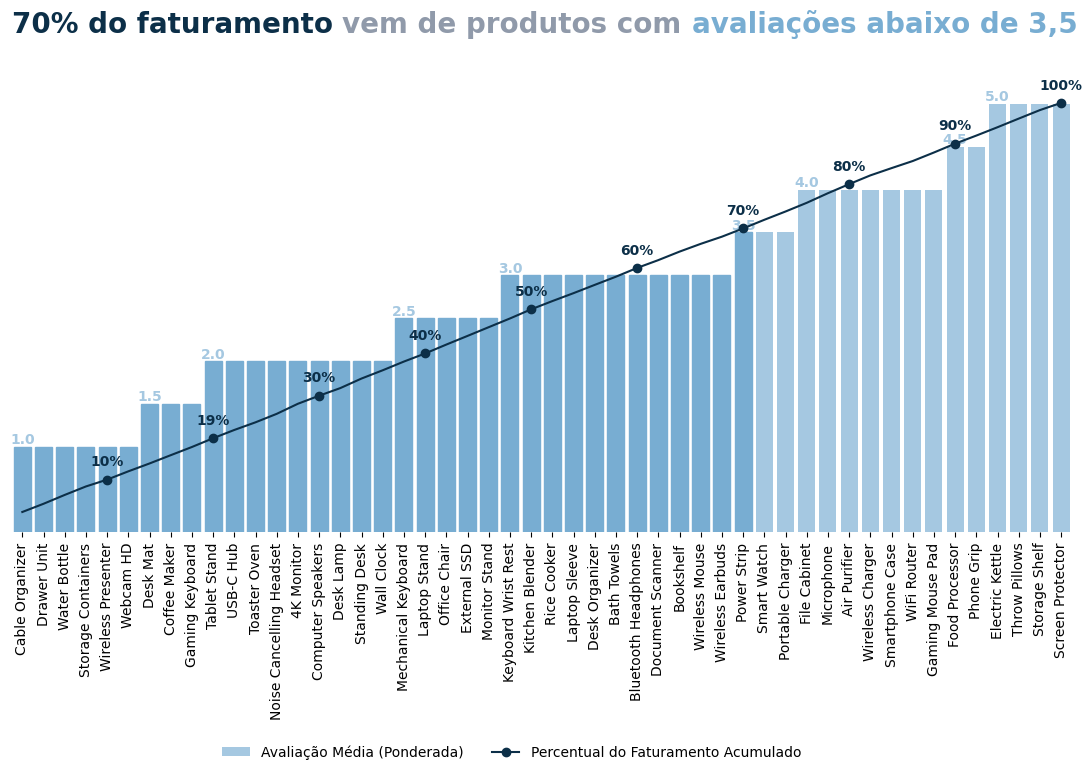

In [16]:
# Definindo cores utilizadas no gráfico
cor_barras = '#a5c8e1'
barras_selecionadas = '#78add2'
cor_linhas = '#0c2f48'
cor_titulo = '#909aaa'

# Definindo o tamanho da figura do gráfico
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx() # Permite desenhar a linha de faturamento acumulado sobre o gráfico de barras, mantendo escalas separadas

# Gráfico de Barras com a média ponderada das avaliações
barras = ax.bar(df_produtos_avaliacao_faturamento['Nome do Produto'],
                df_produtos_avaliacao_faturamento['Media Ponderada'], 
                color=cor_barras)


# Adicionando os rótulos somente no primeira barra
rotulos = df_produtos_avaliacao_faturamento['Media Ponderada'].values
ax.bar_label(barras, 
             labels=[rotulo if rotulos[i] != rotulos[i - 1] else '' for i, rotulo in enumerate(rotulos)],
             color=cor_barras, fontweight="bold", padding=0)


# Criando pontos de marcação para cada 10% do faturamento acumulado
decis = np.arange(0.1, 1.1, 0.1)
indices_decis = np.interp(decis, df_produtos_avaliacao_faturamento['Percentual do Faturamento Acumulativo'], np.arange(len(df_produtos_avaliacao_faturamento)))
indices_decis = np.round(indices_decis).astype(int)

# Pegando os nomes e valores acumulados nos pontos de 10%
categorias_decis = df_produtos_avaliacao_faturamento['Nome do Produto'].iloc[indices_decis]
valores_decis = df_produtos_avaliacao_faturamento['Percentual do Faturamento Acumulativo'].iloc[indices_decis]

# Criando grafico de linha do Percentual Acumulado no eixo secundário
ax2.plot(df_produtos_avaliacao_faturamento['Nome do Produto'],
         df_produtos_avaliacao_faturamento['Percentual do Faturamento Acumulativo'],
         color=cor_linhas)

# Adicionando marcadores na linha
ax2.scatter(categorias_decis,valores_decis, color=cor_linhas)

# Adicionando rótulos nos marcadores
for categoria, valor in zip(categorias_decis, valores_decis):
    plt.annotate(f"{valor:.0%}", (categoria,valor), 
                 xytext=(0, 10), textcoords="offset points", ha="center",color=cor_linhas, fontweight="bold")

# Destacando barras que estão dentro dos 70% do faturamento
for i , barra in enumerate(barras):
    valor = df_produtos_avaliacao_faturamento['Percentual do Faturamento Acumulativo'].iloc[i]
    if valor < 0.7:
        barras[i].set_color(barras_selecionadas)

# Ajustando rótulos do eixo X
ax.set_xticklabels(df_produtos_avaliacao_faturamento['Nome do Produto'], rotation=90)

# Ajustando a posição do gráfico para dar espaço ao título
ax.set_position([0, 0, 1.06, 0.9])  


# Adicionando o título
fig.text(0, 1, '70% do faturamento', fontsize=20, fontweight='bold',color=cor_linhas)
fig.text(0.33, 1, 'vem de produtos com ', fontsize=20, fontweight='bold',color=cor_titulo)
fig.text(0.68, 1, 'avaliações abaixo de 3,5', fontsize=20, fontweight='bold',color=barras_selecionadas)

# Removendo espaços extras dos limites do eixo X da esquerda e direita
ax.set_xlim(-0.5, len(df_produtos_avaliacao_faturamento) - 0.5)
ax2.set_xlim(-0.5, len(df_produtos_avaliacao_faturamento) - 0.5)

#Removendo ticks do eixo y da direita e esquerda
ax.tick_params(axis="y", left=False, labelleft=False)
ax2.tick_params(axis="y", right=False, labelright=False)

#Removendo as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)

# Criando legenda manual com ícones personalizados
legenda_itens = [
    Patch(facecolor=cor_barras, label="Avaliação Média (Ponderada)"),  # Barras normais
    Line2D([0], [0], color=cor_linhas, marker='o', linestyle='-', label="Percentual do Faturamento Acumulado")  # Linha com marcadores
]

# Adicionando a legenda à figura
fig.legend(handles=legenda_itens, loc="upper center", bbox_to_anchor=(0.5, -0.4), ncol=2, frameon=False)

# Salvando o gráfico como imagem
plt.savefig("graficos/av_percent_fat_produto.png", dpi=300, bbox_inches='tight')
plt.show()

A visualização mostra claramente que 70% do faturamento da loja vem de produtos com avaliações médias inferiores a 3,5.
O resultado evidencia que produtos com avaliações mais baixas concentram a maior parte da receita. Esse dado levanta a segunda questão: 

**Os produtos que mais faturam realmente possuem boas avaliações?**

Vamos explorar isso a seguir.

---
### Criando Gráfico dos Produtos que Mais Faturam em Relação a sua Avaliação

Nesta etapa, vamos criar um gráfico que relaciona a avaliação média ponderada dos produtos com o faturamento individual, destacando os cinco produtos que mais faturam. A ideia é entender se esses produtos também possuem boas avaliações.

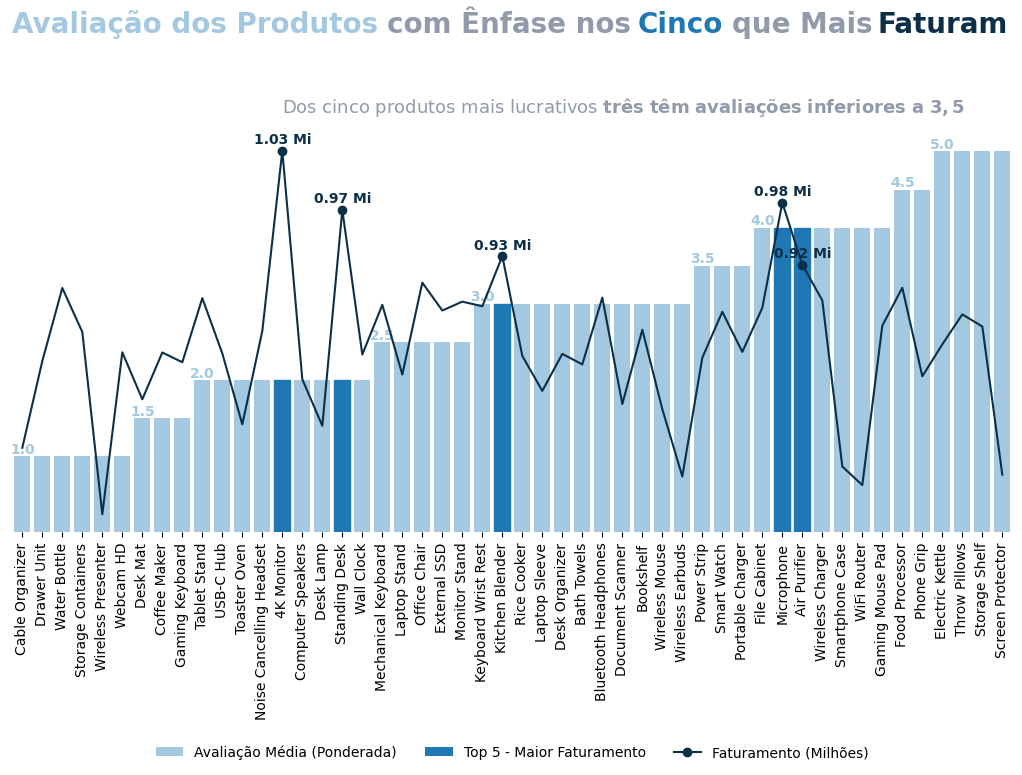

In [17]:
# Definindo cores utilizadas no gráfico
cor_barras = '#a5c8e1'
barras_selecionadas = '#1f77b4'
cor_linhas = '#0c2f48'
cor_titulo = '#909aaa'

# Definindo o tamanho da figura do gráfico
fig, ax = plt.subplots(figsize=(10,5)) 
ax2 = ax.twinx() # Permite desenhar a linha de faturamento acumulado sobre o gráfico de barras, mantendo escalas separadas


# Gráfico de barras: avaliação média ponderada por produto
barras = ax.bar(df_produtos_avaliacao_faturamento['Nome do Produto'],
                df_produtos_avaliacao_faturamento['Media Ponderada'], 
                color=cor_barras)

# Gráfico de linha: faturamento por produto
ax2.plot(df_produtos_avaliacao_faturamento['Nome do Produto'],
         df_produtos_avaliacao_faturamento['Faturamento'], 
         color=cor_linhas)

# Adicionando os rótulos somente no primeira barra
rotulos = df_produtos_avaliacao_faturamento['Media Ponderada'].values
ax.bar_label(barras, 
             labels=[rotulo if rotulos[i] != rotulos[i - 1] else '' for i, rotulo in enumerate(rotulos)],
             color=cor_barras, fontweight="bold", padding=0)


# Adionando Rotulos nos pontos do top 5 produtos com maior faturamento
top_5_indices = np.argsort(df_produtos_avaliacao_faturamento['Faturamento'])[-5:]

for i in top_5_indices:
    valor = df_produtos_avaliacao_faturamento['Faturamento'].iloc[i]
    plt.annotate(f"{valor/1_000_000:.2f} Mi", (i, valor), xytext=(0, 5), textcoords="offset points",
                 ha="center", color=cor_linhas, fontweight="bold")

# Destacando barras dos produtos que estão entre os 5 maiores faturamentos
for i , barra in enumerate(barras):
    if i in top_5_indices.values:
        barras[i].set_color(barras_selecionadas)


# Adicionando os pontos dos produtos no top 5 maior faturamento
ax2.plot(df_produtos_avaliacao_faturamento['Nome do Produto'].iloc[top_5_indices], 
         df_produtos_avaliacao_faturamento['Faturamento'].iloc[top_5_indices], 'o',
         color=cor_linhas)

# Ajustando rótulos do eixo X
ax.set_xticklabels(df_produtos_avaliacao_faturamento['Nome do Produto'], rotation=90)


#Removendo ticks do eixo y da direita e esquerda
ax.tick_params(axis="y", left=False, labelleft=False)
ax2.tick_params(axis="y", right=False, labelright=False)

# Ajustando a posição do gráfico para dar espaço ao título
ax.set_position([0, 0, 1, 0.8])  

# Removendo espaços extras dos limites do eixo X da esquerda e direita
ax.set_xlim(-0.5, len(df_produtos_avaliacao_faturamento) - 0.5)
ax2.set_xlim(-0.5, len(df_produtos_avaliacao_faturamento) - 0.5)

#Removendo as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)


# Título principal com destaque visual
fig.text(0, 1, 'Avaliação dos Produtos', fontsize=20, fontweight='bold',color=cor_barras)
fig.text(0.375, 1, 'com Ênfase nos ', fontsize=20, fontweight='bold',color=cor_titulo)
fig.text(0.6255, 1, 'Cinco', fontsize=20, fontweight='bold',color=barras_selecionadas)
fig.text(0.72, 1, 'que Mais', fontsize=20, fontweight='bold',color=cor_titulo)
fig.text(0.865, 1, 'Faturam', fontsize=20, fontweight='bold',color=cor_linhas) 

# Subtítulo com insight direto
fig.text(0.27, 0.84, r'Dos cinco produtos mais lucrativos $\bf{três\ têm\ avaliações\ inferiores\ a\ 3,5}$',
        fontsize=13,color=cor_titulo)



# Criando legenda manual com ícones personalizados
legenda_itens = [
    Patch(facecolor=cor_barras, label="Avaliação Média (Ponderada)"),  # Barras normais
    Patch(facecolor=barras_selecionadas, label="Top 5 - Maior Faturamento"),  # Barras do Top 5
    Line2D([0], [0], color=cor_linhas, marker='o', linestyle='-', label="Faturamento (Milhões)")  # Linha com marcadores
]

# Adicionando a legenda à figura
fig.legend(handles=legenda_itens, loc="upper center", bbox_to_anchor=(0.5, -0.4), ncol=3, frameon=False)

# Salvando o gráfico como imagem
plt.savefig("graficos/av_fat_produto.png", dpi=300, bbox_inches='tight')
plt.show()

Fica evidente que três dos cinco produtos que mais geram receita têm avaliações abaixo de 3,5, indicando que alto faturamento não necessariamente depende de boa avaliação. Isso nos leva para a terceira questão:

**Os produtos mais vendidos realmente possuem boas avaliações?**

Na próxima etapa, vamos explorar essa relação comparando a avaliação média ponderada com a quantidade de vendas, e assim entender se alta demanda está, de fato, atrelada à satisfação do cliente.

---
### Analisando a Relação entre Avaliação e Volume de Vendas

Antes de criarmos o próximo gráfico, que irá relacionar avaliação média ponderada com a quantidade de vendas dos produtos, precisamos garantir que essa informação esteja disponível no DataFrame `df_produtos_avaliacao_faturamento`.

Para isso, vamos agrupar as vendas por produto e somar as quantidades vendidas. Em seguida, faremos o merge com o DataFrame principal para consolidar as informações.

In [18]:
# Agrupando a quantidade total vendida de cada produto
df_quantidade_vendas = df_vendas.groupby("Nome do Produto")['Quantidade Vendida'].sum().reset_index()

# Mesclando a quantidade vendida com o DataFrame principal de avaliação e faturamento
df_produtos_avaliacao_faturamento = df_produtos_avaliacao_faturamento.merge(
    df_quantidade_vendas, 
    on='Nome do Produto', 
    how='left'
)

# Exibindo as primeiras linhas do DataFrame resultante
display(df_produtos_avaliacao_faturamento.head())

,Nome do Produto,Media Ponderada,Faturamento,Percentual do Faturamento,Percentual do Faturamento Acumulativo,Quantidade Vendida
0,Cable Organizer,1.0,758298.83,0.017844,0.017844,1760
1,Drawer Unit,1.0,837184.03,0.019700,0.037545,1889
2,Water Bottle,1.0,903662.53,0.021265,0.058809,1948
3,Storage Containers,1.0,863608.96,0.020322,0.079132,1853
4,Wireless Presenter,1.0,697765.51,0.016420,0.095551,1631


#### Criando gráfico dos produtos que mais vendem em relação à sua avaliação

Agora que temos a quantidade vendida integrada ao nosso DataFrame, vamos criar um gráfico que mostre os produtos mais vendidos em relação às suas avaliações médias

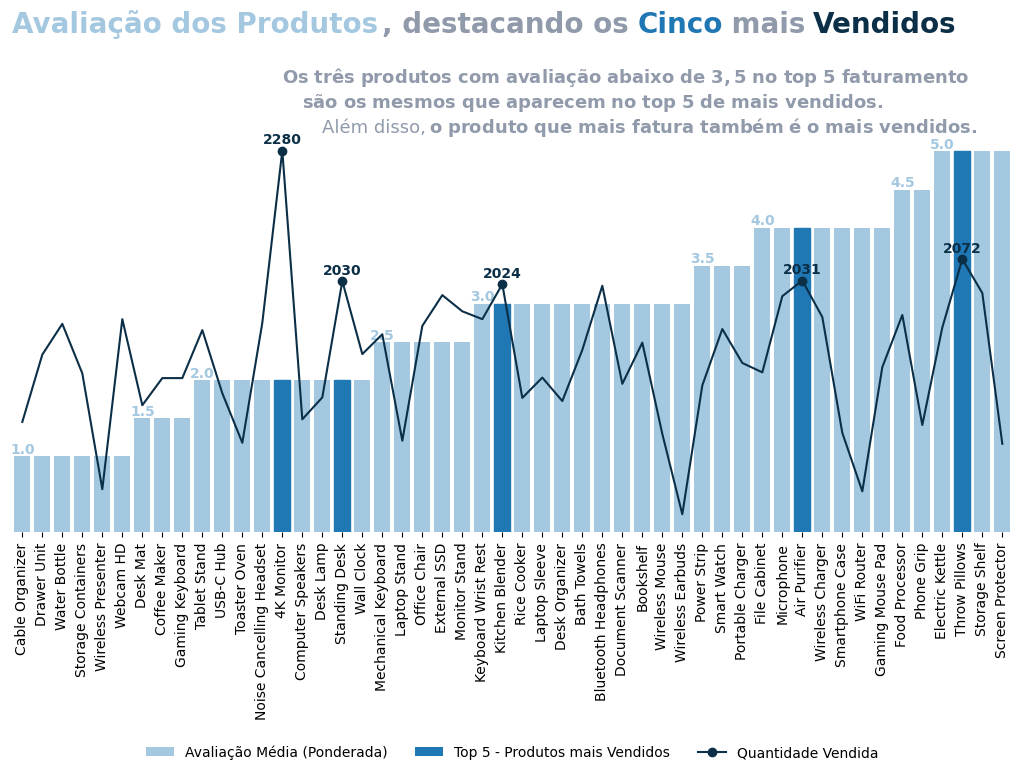

In [19]:
# Definindo cores utilizadas no gráfico
cor_barras = '#a5c8e1'
barras_selecionadas = '#1f77b4'
cor_linhas = '#0c2f48'
cor_titulo = '#909aaa'

# Definindo o tamanho da figura do gráfico
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()# Permite desenhar a linha de faturamento acumulado sobre o gráfico de barras, mantendo escalas separadas


# Gráfico de barras: avaliação média ponderada
barras = ax.bar(df_produtos_avaliacao_faturamento['Nome do Produto'],
       df_produtos_avaliacao_faturamento['Media Ponderada'], 
       color=cor_barras)

# Gráfico de linha: quantidade vendida
ax2.plot(df_produtos_avaliacao_faturamento['Nome do Produto'],
         df_produtos_avaliacao_faturamento['Quantidade Vendida'], 
         color=cor_linhas)

# Adicionando os rótulos somente no primeira barra
rotulos = df_produtos_avaliacao_faturamento['Media Ponderada'].values
ax.bar_label(barras, 
             labels=[rotulo if rotulos[i] != rotulos[i - 1] else '' for i, rotulo in enumerate(rotulos)],
             color=cor_barras, fontweight="bold", padding=0)


# Adionando Rotulos nos pontos do top 5 produtos com maior faturamento
top_5_indices = np.argsort(df_produtos_avaliacao_faturamento['Quantidade Vendida'])[-5:]

for i in top_5_indices:
    valor = df_produtos_avaliacao_faturamento['Quantidade Vendida'].iloc[i]
    plt.annotate(f"{valor:.0f}", (i, valor), xytext=(0, 5), textcoords="offset points",
                 ha="center", color=cor_linhas, fontweight="bold")

# Destacando barras dos produtos que estão entre os 5 maiores faturamentos
for i , barra in enumerate(barras):
    if i in top_5_indices.values:
            barras[i].set_color(barras_selecionadas)


# Adicionando os pontos dos produtos no top 5 maior faturamento
ax2.plot(df_produtos_avaliacao_faturamento['Nome do Produto'].iloc[top_5_indices], 
         df_produtos_avaliacao_faturamento['Quantidade Vendida'].iloc[top_5_indices], 'o',
         color=cor_linhas)


#Removendo ticks do eixo y da direita e esquerda
ax.tick_params(axis="y", left=False, labelleft=False)
ax2.tick_params(axis="y", right=False, labelright=False)

# Ajustando a posição do gráfico para dar espaço ao título
ax.set_position([0, 0, 1, 0.8])  


# Removendo espaços extras dos limites do eixo X da esquerda e direita
ax.set_xlim(-0.5, len(df_produtos_avaliacao_faturamento) - 0.5)
ax2.set_xlim(-0.5, len(df_produtos_avaliacao_faturamento) - 0.5)

#Removendo as bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)

# Ajustando rótulos do eixo X
ax.set_xticklabels(df_produtos_avaliacao_faturamento['Nome do Produto'], rotation=90)


# Título principal
fig.text(0, 1, 'Avaliação dos Produtos', fontsize=20, fontweight='bold',color=cor_barras)
fig.text(0.37, 1, ', destacando os ', fontsize=20, fontweight='bold',color=cor_titulo)
fig.text(0.6255, 1, 'Cinco', fontsize=20, fontweight='bold',color=barras_selecionadas)
fig.text(0.71, 1, ' mais', fontsize=20, fontweight='bold',color=cor_titulo)
fig.text(0.801, 1, 'Vendidos', fontsize=20, fontweight='bold',color=cor_linhas) 


# Subtítulo com insight direto
fig.text(0.27, 0.9, r'$\bf{Os\ três\ produtos\ com\ avaliação\ abaixo\ de\ 3,5\ no\ top\ 5 \ faturamento}$',
        fontsize=13,color=cor_titulo)
fig.text(0.29, 0.85, r'$\bf{são\ os\ mesmos\ que\ aparecem\ no\ top\ 5\ de\ mais\ vendidos.}$',
        fontsize=13,color=cor_titulo)

fig.text(0.31, 0.8, 'Além disso, ',
        fontsize=13,color=cor_titulo)
fig.text(0.417, 0.8, r'$\bf{o\ produto\ que\ mais\ fatura\ também\ é\ o\ mais\ vendidos.}$',
        fontsize=13,color=cor_titulo)

# Criando legenda manual com ícones personalizados
legenda_itens = [
    Patch(facecolor=cor_barras, label="Avaliação Média (Ponderada)"),  
    Patch(facecolor=barras_selecionadas, label="Top 5 - Produtos mais Vendidos"), 
    Line2D([0], [0], color=cor_linhas, marker='o', linestyle='-', label="Quantidade Vendida")  
]

# Adicionando a legenda à figura
fig.legend(handles=legenda_itens, loc="upper center", bbox_to_anchor=(0.5, -0.4), ncol=3, frameon=False)

# Salvando o gráfico como imagem
plt.savefig("graficos/av_qtd_vendas_produto.png", dpi=300, bbox_inches='tight')
plt.show()

Encontramos um padrão semelhante ao observado na análise de faturamento: Dos cinco produtos mais vendidos, três possuem avaliação média inferior a 3,5 — e esses mesmos três também aparecem entre os cinco com maior faturamento. Além disso, o produto que lidera em faturamento é também o mais vendido e tem uma avaliação média de apenas 2. Esse comportamento reforça a ideia de que a alta demanda por esses itens não está necessariamente atrelada à satisfação dos consumidores expressa nas avaliações.

No entanto, realizar essa análise produto a produto pode se tornar limitado e até redundante. Por isso, para entender se essa desconexão entre avaliação e desempenho de vendas também se repete em um nível mais amplo, vamos observar o comportamento por categoria.

E é por isso que iremos para à última pergunta: 

**Como a avaliação média das categorias se relaciona com seu faturamento?**

---
### Análise da Relação entre Avaliações e Faturamento por Categoria

Antes de partirmos para a análise visual da relação entre as avaliações médias e o faturamento por categoria, vale lembrar que até aqui trabalhamos os dados a nível de produto.
Agora, para termos uma visão mais estratégica e ampla, precisamos **reorganizar essas informações por categoria**.

#### Calculando a Média Ponderada das Avaliações por Categoria

Primeiro, agrupamos o DataFrame `df_reviewr` por categoria e avaliação, contando quantas vezes cada nota apareceu:

In [20]:
# Agrupa por categoria e avaliação, contando a quantidade de avaliações por nota
resultado = df_reviewr.groupby(['Categoria', 'Avaliacao'], observed=False)['Avaliacao'].count().reset_index(name='Quantidade de Avaliacoes')

Depois, usamos esses dados para calcular a **média ponderada das avaliações por categoria**, levando em conta o peso de cada nota com base na quantidade de avaliações:

In [21]:
# Calcula a média ponderada da avaliação por categoria
df_categoria_avaliação = resultado.groupby('Categoria', observed=False).apply(
    lambda x: (x['Avaliacao'] * x['Quantidade de Avaliacoes']).sum() / x['Quantidade de Avaliacoes'].sum()
).reset_index(name='Media Ponderada')

# Ordena da menor para a maior média
df_categoria_avaliação = df_categoria_avaliação.sort_values(by='Media Ponderada')

# Exibe as primeiras linhas do DataFrame
display(df_categoria_avaliação.head())

,Categoria,Media Ponderada
2,Furniture,2.636364
1,Electronics,2.689655
3,Home & Kitchen,2.736842
0,Accessories,2.950000


#### Calculando o Faturamento Total por Categoria

Agora, vamos trabalhar com o DataFrame `df_vendas`, agrupando por categoria para somar o valor total de vendas:

In [22]:
# Agrupa por categoria e soma o valor total de vendas
df_faturamento_por_categoria = df_vendas.groupby(['Categoria do Produto'])[['Valor Total de Vendas']].sum().reset_index()

# Renomeia a coluna para 'Faturamento'
df_faturamento_por_categoria = df_faturamento_por_categoria.rename(columns={'Valor Total de Vendas': 'Faturamento'})

# Renomeia a coluna de categoria para que fique igual à do outro DataFrame
df_faturamento_por_categoria.rename(columns={'Categoria do Produto': 'Categoria'}, inplace=True)

# Exibe o DataFrame resultante
display(df_faturamento_por_categoria)

,Categoria,Faturamento
0,Accessories,9833968.69
1,Electronics,15247167.14
2,Furniture,6231783.08
3,Home & Kitchen,11182785.90


#### Unindo as Informações

Agora que temos a média de avaliação e o faturamento por categoria, vamos **juntar os dois DataFrames** em um só. Para isso, utilizamos o `merge` com o parâmetro `how='left'`.

Essa abordagem garante que todas as categorias que possuem avaliação apareçam no DataFrame final, mesmo que não tenham registrado faturamento:

In [23]:
# Mescla os DataFrames de avaliação e faturamento por categoria
df_categoria_faturamento_avaliacao = df_categoria_avaliação.merge(df_faturamento_por_categoria, on="Categoria", how='left')

# Exibe o DataFrame final com todas as informações combinadas
df_categoria_faturamento_avaliacao

,Categoria,Media Ponderada,Faturamento
0,Furniture,2.636364,6231783.08
1,Electronics,2.689655,15247167.14
2,Home & Kitchen,2.736842,11182785.90
3,Accessories,2.950000,9833968.69


Com esse DataFrame consolidado, temos as informações necessárias para visualizar a relação entre avaliações médias e faturamento por categoria.

---
### Criando o Gráfico da Relação entre Avaliação Média e Faturamento por Categoria

Agora que temos um DataFrame consolidado com a média ponderada das avaliações e o faturamento por categoria, vamos visualizar essa relação por meio de um gráfico de barras e linhas. A barra representa a média de avaliação da categoria, enquanto a linha mostra o faturamento correspondente. Esse gráfico nos ajuda a entender como essas duas variáveis se comportam lado a lado.

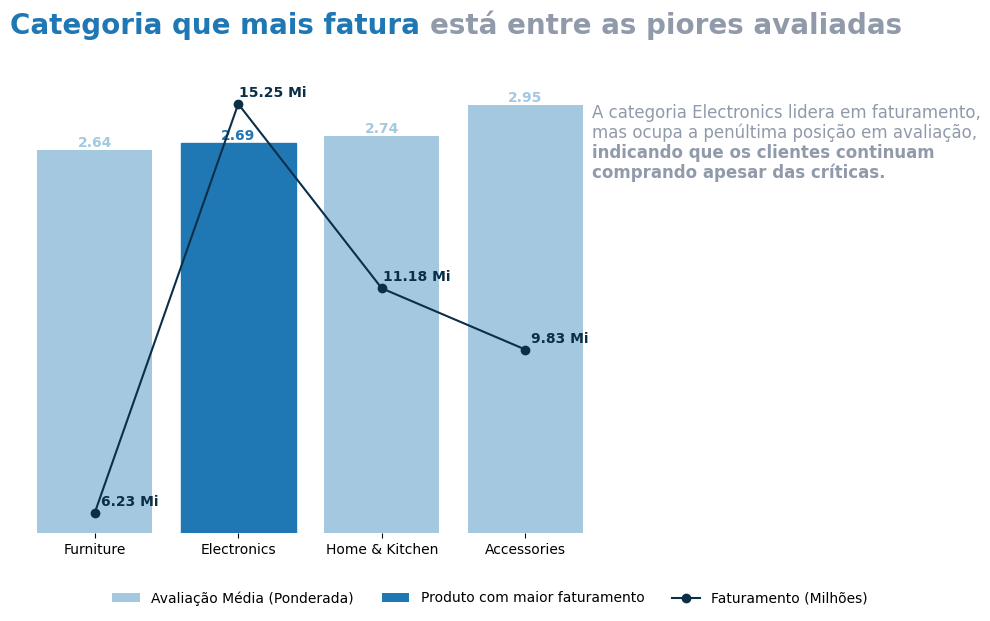

In [24]:
# Definindo cores utilizadas no gráfico
cor_barras = '#a5c8e1'
barras_selecionadas = '#1f77b4'
cor_linhas = '#0c2f48'
cor_titulo = '#909aaa'

# Definindo o tamanho da figura do gráfico
fig, ax = plt.subplots(figsize=(6,5))
ax2 = ax.twinx() # Permite desenhar a linha de faturamento acumulado sobre o gráfico de barras, mantendo escalas separadas

# Criando gráfico de barras com a média de avaliação por categoria
barras = ax.bar(df_categoria_faturamento_avaliacao['Categoria'],
                df_categoria_faturamento_avaliacao['Media Ponderada'],
                color=cor_barras)

# Criando a linha com o faturamento por categoria
ax2.plot(df_categoria_faturamento_avaliacao['Categoria'], df_categoria_faturamento_avaliacao['Faturamento'], color=cor_linhas, marker='o')


# Inserindo rótulos nas linhas com o valor do faturamento em milhões
for i, valor in enumerate(df_categoria_faturamento_avaliacao['Faturamento']):
    ax2.annotate(f"{valor/1_000_000:.2f} Mi", (i, valor), xytext=(25, 5), textcoords="offset points",
                 ha="center", color=cor_linhas, fontweight="bold")

# Destacando a barra com o maior faturamento
idx_faturamento_max = df_categoria_faturamento_avaliacao['Faturamento'].idxmax() 
barras[idx_faturamento_max].set_color(barras_selecionadas)

# Inserindo rótulos nas barras com o valor da média de avaliação
labels = [f'{label:.2f}' for label in ax.containers[0].datavalues]
for i, (barra, label) in enumerate(zip(ax.containers[0], labels)):
    cor = barras_selecionadas if i == idx_faturamento_max else cor_barras
    ax.text(barra.get_x() + barra.get_width() / 2,
            barra.get_height(),
            label,
            ha='center', va='bottom', fontweight='bold', color=cor)


#Removendo ticks do eixo y da direita e esquerda
ax.tick_params(axis="y", left=False, labelleft=False)
ax2.tick_params(axis="y", right=False, labelright=False)

# Ajustando a posição do gráfico para dar espaço ao título
ax.set_position([0, 0, 1, 0.9]) 

# Título principal
fig.text(0, 1, 'Categoria que mais fatura', fontsize=20, fontweight='bold',color=barras_selecionadas)
fig.text(0.7, 1, 'está entre as piores avaliadas', fontsize=20, fontweight='bold',color=cor_titulo)

# Subtítulo com insight direto
fig.text(0.97, 0.83, 'A categoria Electronics lidera em faturamento,', fontsize=12,color=cor_titulo)
fig.text(0.97, 0.79, 'mas ocupa a penúltima posição em avaliação,', fontsize=12,color=cor_titulo)
fig.text(0.97, 0.75, 'indicando que os clientes continuam', fontsize=12,fontweight='bold', color=cor_titulo)
fig.text(0.97, 0.71, 'comprando apesar das críticas.', fontsize=12,fontweight='bold', color=cor_titulo)


# Removendo bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)


# Criando legenda manual com ícones personalizados
legenda_itens = [
    Patch(facecolor=cor_barras, label="Avaliação Média (Ponderada)"),  
    Patch(facecolor=barras_selecionadas, label="Produto com maior faturamento"), 
    Line2D([0], [0], color=cor_linhas, marker='o', linestyle='-', label="Faturamento (Milhões)")  
]

# Adicionando a legenda à figura
fig.legend(handles=legenda_itens, loc="upper center", bbox_to_anchor=(0.8, -0.09), ncol=3, frameon=False)

# Salvando o gráfico como imagem
plt.savefig("graficos/av_fat_categoria.png", dpi=300, bbox_inches='tight')
plt.show()

Os resultados mostram que a categoria *Electronics*, apesar de ser a que mais fatura, está em penúltimo lugar no ranking de avaliações (3ª de 4). Esse dado sugere que produtos eletrônicos têm alta demanda, mas podem não satisfazer totalmente os consumidores. A discrepância entre faturamento e avaliação pode indicar problemas na qualidade, usabilidade ou atendimento pós-venda, levantando um alerta importante para futuras ações de melhoria.

---
### Conclusão Geral das Análises

Ao longo da análise, identificamos padrões significativos sobre o comportamento dos consumidores ao relacionar vendas e avaliações dos produtos:

- **Distribuição do Faturamento por Avaliação Média**: A primeira análise revelou um dado marcante: 70% do faturamento total é gerado por produtos com avaliação média de até 3,5. Essa conclusão vem da distribuição percentual acumulada do faturamento por nota média e indica que os produtos mais lucrativos não são, necessariamente, os mais bem avaliados. Isso sugere um distanciamento entre satisfação do cliente e desempenho em vendas, o que levanta alertas para estratégias de qualidade, pós-venda e fidelização.

- **Faturamento e Avaliações por Produto**: Reforçando esse ponto, descobrimos que o produto mais vendido também é o de maior faturamento, mas apresenta uma baixa avaliação média de apenas 2. Além disso, três dos cinco produtos mais vendidos estão também no top 5 de faturamento e têm avaliações abaixo de 3,5, o que confirma a existência de um padrão: produtos podem vender muito mesmo sem agradar plenamente os clientes.

- **Relação por Categoria**: Quando expandimos a análise para o nível de categoria, observamos o mesmo comportamento. A categoria Electronics, líder em faturamento, ocupa a penúltima posição em avaliação média. Mesmo com críticas, os consumidores continuam comprando, possivelmente devido à alta demanda ou à percepção de necessidade.

### Futuros Passos Recomendados

1. Investigar a fundo as reclamações dos produtos mais vendidos, principalmente da categoria Electronics, para entender se há padrões de insatisfação (como defeitos, logística, suporte ao cliente).

2. Analisar o impacto de campanhas de marketing ou descontos nas vendas desses produtos mal avaliados — eles estão vendendo por necessidade ou por incentivo?

3. Monitorar a fidelização desses consumidores, verificando se eles voltam a comprar da mesma categoria ou se há uma queda em compras repetidas.


---
Essa análise traz à tona uma reflexão importante: **vender bem não é sinônimo de satisfação**. E entender esse equilíbrio é essencial para manter um negócio sustentável e com boa reputação no longo prazo.